In [ ]:
from IPython.display import display, Image
import pandas as pd

#데이터 확인하기
macbook = pd.read_csv('/content/macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


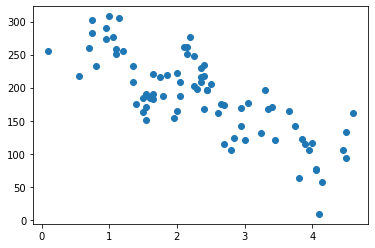

In [ ]:
import matplotlib.pyplot as plt
#데이터 시각화
plt.scatter(macbook['used_years'],macbook['price'])
plt.show()

In [ ]:
#상관계수
import numpy as np
np.corrcoef(macbook['used_years'],macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

In [ ]:
x = macbook['used_years']
y = macbook['price']

In [ ]:
def model(x,w,b):
    y = x * w + b
    return y

In [ ]:
w = 3.1
b = 2.3

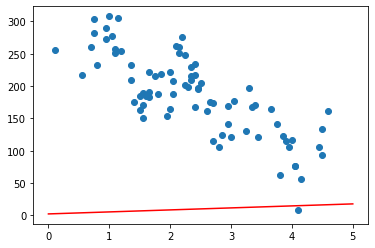

In [ ]:
x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [ ]:
x = macbook["used_years"].values
x

array([2.65, 3.8 , 0.95, 4.5 , 4.45, 2.7 , 3.05, 2.25, 2.3 , 1.85, 1.5 ,
       0.95, 2.6 , 0.55, 2.05, 0.75, 3.95, 2.8 , 2.05, 1.15, 1.35, 3.35,
       1.35, 2.45, 2.4 , 0.1 , 3.45, 2.35, 0.7 , 1.05, 1.75, 4.1 , 4.5 ,
       4.  , 2.  , 2.45, 2.5 , 2.1 , 3.  , 4.05, 2.7 , 2.15, 3.3 , 2.4 ,
       2.85, 1.65, 1.55, 2.15, 3.4 , 1.55, 0.8 , 2.95, 2.4 , 1.4 , 1.65,
       2.25, 3.85, 3.9 , 4.6 , 2.35, 4.05, 1.2 , 1.95, 1.6 , 2.  , 1.8 ,
       3.75, 3.65, 2.35, 2.2 , 1.  , 4.15, 1.1 , 1.55, 2.95, 1.5 , 1.65,
       1.1 , 3.25, 0.75])

In [ ]:
#임의로 정한값 w,b로 x 값을 계산해보면 price와 차이가 나는지 알 수 있다.
prediction = model(x,w,b)
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [ ]:
#prediction -> 예측값
macbook['prediction'] = prediction
macbook.head()

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


In [ ]:
#error -> 정답과 예측값 간의 차이
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


In [ ]:
def RMSE(a,b):    #MSE = 제곱된 오차들의 평균임 RMSE = MSE의 제곱근을 씌움 (루트)
    mse = ((a-b)**2).mean()
    rmse = mse ** 0.5
    return rmse

In [ ]:
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)
print(predictions)

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]


In [ ]:
rmse = RMSE(predictions, y)
rmse

188.81322969819274

In [ ]:
#손실함수
def loss(x,w,b,y):
    predictions = model(x,w,b)
    L = RMSE(predictions,y)
    return L

In [ ]:
#x,w,b,y를 입력받아 손실함수값을 계산한 후, w와 b 각각에 대한 기울기를 계산해줌
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

In [ ]:
#하이퍼 파라미터

#경사하강법에서 필요했던 학습률 η 상수를 정의하고 시작
LEARNING_RATE = 1

In [ ]:
#학습이 어떤식으로 진행되는지 보여줌
losses = []

In [ ]:
#학습
for i in range(1,2001):
    dw,db = gradient(x,w,b,y)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(x,w,b,y)
    losses.append(L)
    if i%100 == 0:
        print('Iteration %d : Loss %0.4f' % (i,L))

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


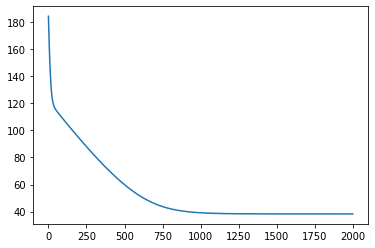

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
w,b

(-44.92756090768412, 293.0815786721102)

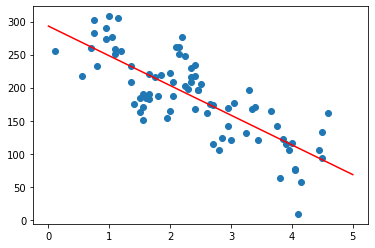

In [ ]:
#모델에 넣을 x값 준비
x = np.linspace(0,5,6)

#x,w,b를 모델에 넣어 y값 출력
y = model(x,w,b)

#일차함수 그리기
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [ ]:
#학습과정에서 보지 않았던 새로운 데이터도 잘 예측하는지 확인

#새로운 데이터 macbook_test
test = pd.read_csv("~/aiffel/bike_regression/data/macbook_test.csv")
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [ ]:
test_x = test['used_years'].values
test_y = test['price'].values

In [ ]:
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,1.20,203,239.168506
1,1.85,206,209.965591
2,2.40,191,185.255432
3,2.85,164,165.038030
4,3.05,176,156.052518
5,3.35,136,142.574250
6,2.55,133,178.516298
7,2.60,181,176.269920
8,2.50,181,180.762676
9,3.10,86,153.806140


In [ ]:
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.168506,-36.168506
1,1.85,206,209.965591,-3.965591
2,2.40,191,185.255432,5.744568
3,2.85,164,165.038030,-1.038030
4,3.05,176,156.052518,19.947482
5,3.35,136,142.574250,-6.574250
6,2.55,133,178.516298,-45.516298
7,2.60,181,176.269920,4.730080
8,2.50,181,180.762676,0.237324
9,3.10,86,153.806140,-67.806140


In [ ]:
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

45.03918284717212

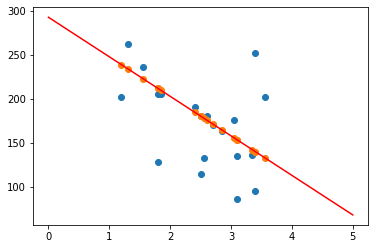

In [ ]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()

In [ ]:
# 다양한 정보로 원하는 값 예측해보기

In [ ]:
#seaborn은 간단한 데이터셋으로 여러 실험을 해볼 수 있는 샘플 데이터셋을 제공함
#제공되는 데이터셋 확인해보기
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#수식에 데이터를 넣어서 계산할거임 -> 문자열들을 0,1로 변환
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex','smoker','day', 'time'])
tips

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


In [ ]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


In [ ]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
import numpy as np

#12개의 정보가 있는 데이터로 tip값을 예측하는거니까 12개의 w와 1개의 b가 필요
W = np.random.rand(12)
b = np.random.rand()

In [ ]:
#for문으로 12번 반복
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [ ]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [ ]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [ ]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [ ]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [9959.93808037 1214.51581633  290.97143567  145.24158232  173.76398204
  262.44903595  102.86469641   30.36986432  162.17368533  140.80477192
  110.52675051  325.68626748]
db: 21.453099245004683


In [ ]:
#학습률 설정
LEARNING_RATE = 0.0001

In [ ]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2.1166
Iteration 20 : Loss 2.0682
Iteration 30 : Loss 2.0279
Iteration 40 : Loss 1.9897
Iteration 50 : Loss 1.9538
Iteration 60 : Loss 1.9198
Iteration 70 : Loss 1.8876
Iteration 80 : Loss 1.8573
Iteration 90 : Loss 1.8285
Iteration 100 : Loss 1.8013
Iteration 110 : Loss 1.7756
Iteration 120 : Loss 1.7512
Iteration 130 : Loss 1.7281
Iteration 140 : Loss 1.7062
Iteration 150 : Loss 1.6854
Iteration 160 : Loss 1.6656
Iteration 170 : Loss 1.6469
Iteration 180 : Loss 1.6290
Iteration 190 : Loss 1.6121
Iteration 200 : Loss 1.5960
Iteration 210 : Loss 1.5806
Iteration 220 : Loss 1.5660
Iteration 230 : Loss 1.5521
Iteration 240 : Loss 1.5388
Iteration 250 : Loss 1.5261
Iteration 260 : Loss 1.5140
Iteration 270 : Loss 1.5024
Iteration 280 : Loss 1.4914
Iteration 290 : Loss 1.4808
Iteration 300 : Loss 1.4707
Iteration 310 : Loss 1.4610
Iteration 320 : Loss 1.4517
Iteration 330 : Loss 1.4428
Iteration 340 : Loss 1.4343
Iteration 350 : Loss 1.4261
Iteration 360 : Loss 1.4182
I

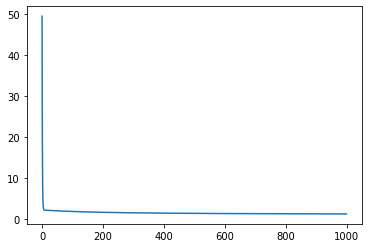

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [ ]:
W, b

(array([ 0.0802169 ,  0.02733722,  0.35200994,  0.31272665,  0.09325913,
         0.16199255,  0.13025377,  0.39496239,  0.29985785,  0.31090101,
        -0.02362484, -0.21607084]),
 0.9138738980847791)

In [ ]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

0.6687019792423168